In [441]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

np.random.seed = 100

## Leg: rubber band

In [446]:
jumping_jen = pd.read_csv(r'../datasets/cleaned_data/jen_jumping_cleaned.csv')
jumping_shreya = pd.read_csv(r'../datasets/cleaned_data/shreya_jumping_cleaned.csv')
jumping_sirui = pd.read_csv(r'../datasets/cleaned_data/sirui_jumping_cleaned.csv')
jumping_benita = pd.read_csv(r'../datasets/cleaned_data/benita_jumping_cleaned.csv')
jumping_nguyen = pd.read_csv(r'../datasets/cleaned_data/nguyen_jumping_cleaned.csv')

jumping_jen["User"] = 1
jumping_shreya["User"] = 2
jumping_sirui["User"] = 3
jumping_benita["User"] = 4
jumping_nguyen["User"] = 5

jumping_all = jumping_jen.append(jumping_shreya, ignore_index=True).append(jumping_benita, ignore_index=True).append(jumping_nguyen, ignore_index=True).append(jumping_sirui, ignore_index=True)

jumping_all.shape

jumping_all["Activity"] = 2

In [447]:
running_jen = pd.read_csv(r'../datasets/cleaned_data/jen_running_cleaned.csv')
running_shreya = pd.read_csv(r'../datasets/cleaned_data/shreya_running_cleaned.csv')
running_sirui = pd.read_csv(r'../datasets/cleaned_data/sirui_running_cleaned.csv')
running_benita = pd.read_csv(r'../datasets/cleaned_data/benita_running_cleaned.csv')
running_nguyen = pd.read_csv(r'../datasets/cleaned_data/nguyen_running_cleaned.csv')

running_jen["User"] = 1
running_shreya["User"] = 2
running_sirui["User"] = 3
running_benita["User"] = 4
running_nguyen["User"] = 5

running_all = running_jen.append(running_shreya, ignore_index=True).append(running_benita, ignore_index=True).append(running_sirui, ignore_index=True).append(running_nguyen, ignore_index=True)

running_all.shape

running_all["Activity"] = 3

In [448]:
walking_jen = pd.read_csv(r'../datasets/cleaned_data/jen_walking_cleaned.csv')
walking_shreya = pd.read_csv(r'../datasets/cleaned_data/shreya_walking_cleaned.csv')
walking_sirui = pd.read_csv(r'../datasets/cleaned_data/sirui_walking_cleaned.csv')
walking_benita = pd.read_csv(r'../datasets/cleaned_data/benita_walking_cleaned.csv')
walking_nguyen = pd.read_csv(r'../datasets/cleaned_data/nguyen_walking_cleaned.csv')

walking_jen["User"] = 1
walking_shreya["User"] = 2
walking_sirui["User"] = 3
walking_benita["User"] = 4
walking_nguyen["User"] = 5

walking_all = walking_jen.append(walking_shreya, ignore_index=True).append(walking_benita, ignore_index=True).append(walking_sirui, ignore_index=True).append(walking_nguyen, ignore_index=True)

walking_all.shape

walking_all["Activity"] = 1

### Mark actitvities:
Stand: 0
Walking: 1
Jumping: 2
Running: 3

In [449]:
act_dict = {0: 'stand',
            1: 'walk',
            2: 'jump',
            3: 'run'}

In [450]:
data_all = walking_all.append(running_all, ignore_index=True).append(jumping_all, ignore_index=True)

In [451]:
data_all['label'] =  data_all.Activity.apply(lambda Activity: act_dict[Activity])

## Data Exploratory Analysis

In [453]:
features = ['G1X', 'G1Y', 'G1Z', 'A1X', 'A1Y', 'A1Z', 'G2X', 'G2Y', 'G2Z', 'A2X', 'A2Y', 'A2Z']
N_FEATURES = 12

In [454]:
def plot_data(start_position, number_of_frames, metrics=metrics, fourier=False):
    print(f"Looking at {metrics} for {number_of_frames} from {start_position}")
   
    i, j = 0, 0
    for label in data_all.label.unique():
        mini_df = data_all[data_all['label']==label].iloc[start_position:start_position+number_of_frames].reset_index()
        for feature in features:
            if feature in ['G2X', 'G2Y', 'G2Z', 'A2X', 'A2Y', 'A2Z']:
                axs[i, 1].plot(mini_df[feature])
            else:
                axs[i, 0].plot(mini_df[feature])
                i = i + 1

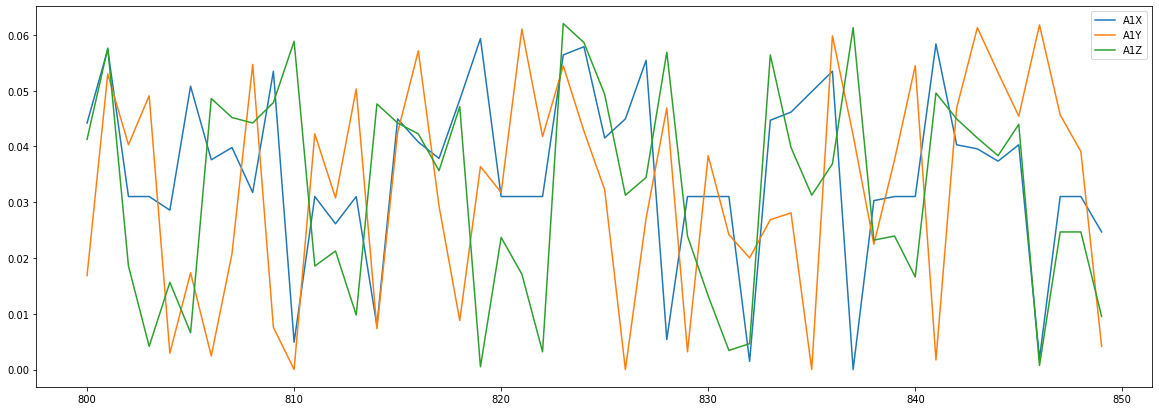

In [455]:
plt.rcParams["figure.figsize"] = (20,7)
jumping_all['A1X'].iloc[800:800+50].plot()
jumping_all['A1Y'].iloc[800:800+50].plot()
jumping_all['A1Z'].iloc[800:800+50].plot()
plt.legend()

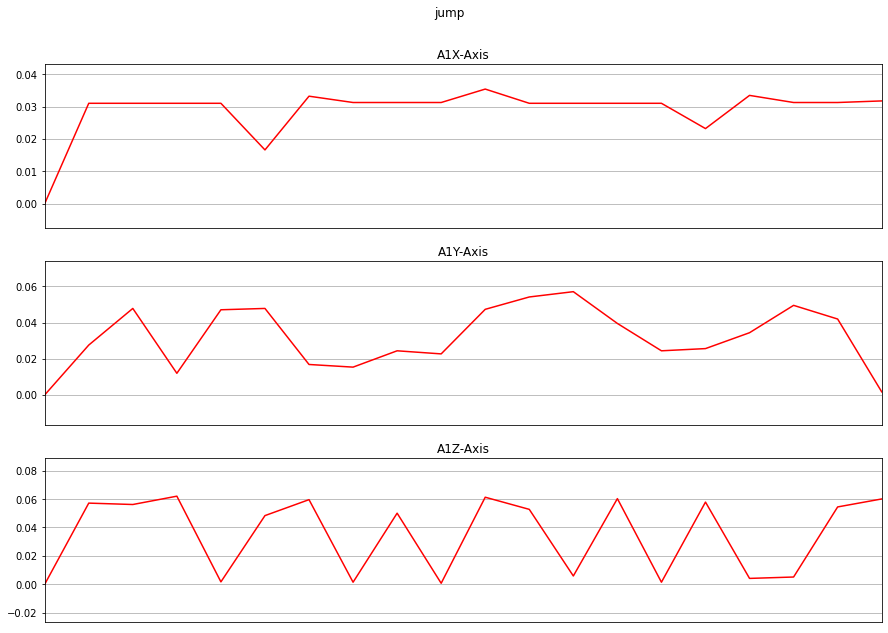

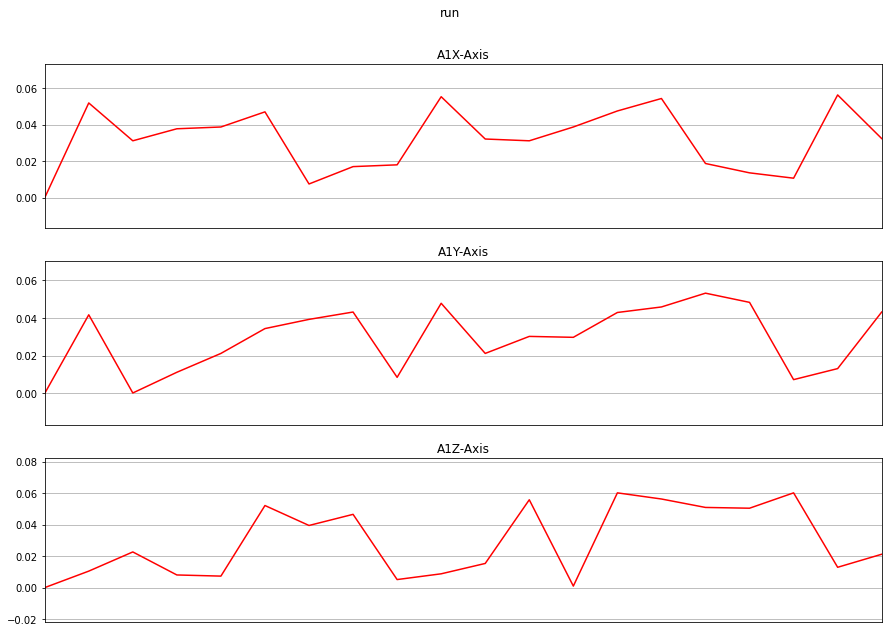

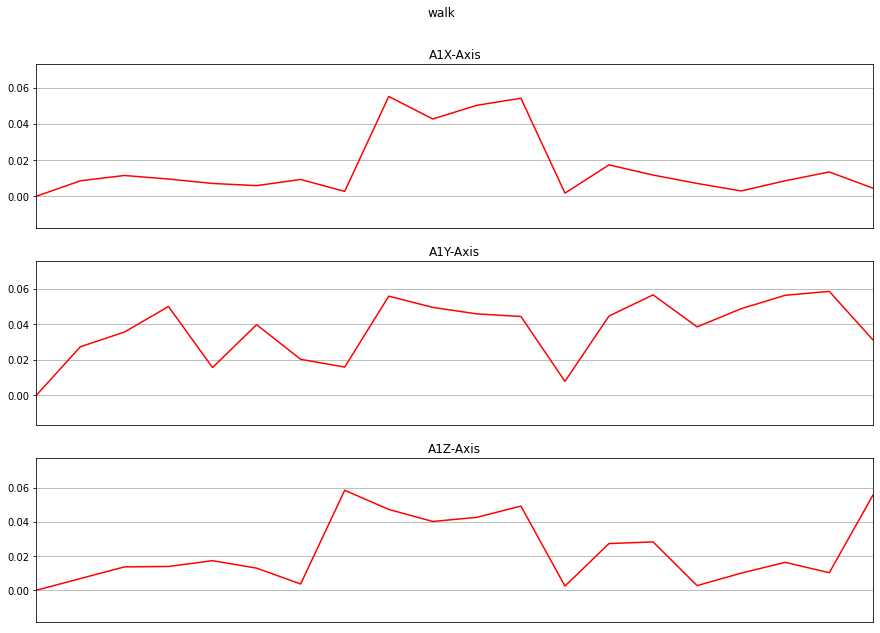

In [456]:
def plot_activity(activity, data):

    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3,
         figsize=(15, 10),
         sharex=True)
    plot_axis(ax0, range(len(data['timestamp'])), data['A1X'], 'A1X-Axis')
    plot_axis(ax1, range(len(data['timestamp'])), data['A1Y'], 'A1Y-Axis')
    plot_axis(ax2, range(len(data['timestamp'])), data['A1Z'], 'A1Z-Axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

def plot_axis(ax, x, y, title):

    ax.plot(x, y, 'r')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

for label in np.unique(labels):
    subset = data_all[data_all['label'] == label][:20]
    plot_activity(label, subset)

In [457]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import coremltools
from scipy import stats
from IPython.display import display, HTML

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

In [458]:
# Define column name of the label vector
LABEL = 'ActivityEncoded'
# Transform the labels from String to Integer via LabelEncoder
le = preprocessing.LabelEncoder()
# Add a new column to the existing DataFrame with the encoded values
data_all[LABEL] = le.fit_transform(data_all['Activity'].values.ravel())

In [459]:
df_test = data_all[data_all['User'] == 4]
df_train = data_all[data_all['User'] != 4]

pd.options.mode.chained_assignment = None  # default='warn'
for feature in features:
    df_train[feature] = df_train[feature] / df_train[feature].max()
    df_test[feature] = df_test[feature] / df_test[feature].max()
# Round numbers
round_dict = {feature: 4 for feature in features}
df_train = df_train.round(round_dict)
df_test = df_test.round(round_dict)

In [460]:
# 2s sampling --> 20 samples
TIME_PERIODS = 20
STEP_DISTANCE = 10

In [461]:
def create_segments_and_labels(df, time_steps, step, label_name):

    # x, y, z acceleration as features
    N_FEATURES = len(features)
    # Number of steps to advance in each iteration (for me, it should always
    # be equal to the time_steps in order to have no overlap between segments)
    # step = time_steps
    segments = []
    labels = []
    series_list = []
    for i in range(0, len(df) - time_steps, step):
        for feature in features:
            s = df[feature].values[i: i + time_steps]
            series_list.append(s)
        # Retrieve the most often used label in this segment
        label = stats.mode(df[label_name][i: i + time_steps])[0][0]
        segments.append(series_list)
        series_list = []
        labels.append(label)

    # Bring the segments into a better shape
    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, N_FEATURES)
    labels = np.asarray(labels)

    return reshaped_segments, labels

x_train, y_train = create_segments_and_labels(df_train,
                                              TIME_PERIODS,
                                              STEP_DISTANCE,
                                              LABEL)

x_test, y_test = create_segments_and_labels(df_test,
                                              TIME_PERIODS,
                                              STEP_DISTANCE,
                                              LABEL)

In [462]:
print('x_train shape: ', x_train.shape)
print(x_train.shape[0], 'training samples')
print('y_train shape: ', y_train.shape)

x_train shape:  (559, 20, 12)
559 training samples
y_train shape:  (559,)


In [463]:
num_time_periods, num_sensors = x_train.shape[1], x_train.shape[2]
num_classes = le.classes_.size
print(list(le.classes_))

[1, 2, 3]


In [464]:
input_shape = (num_time_periods*num_sensors)
x_train = x_train.reshape(x_train.shape[0], input_shape)
print('x_train shape:', x_train.shape)
print('input_shape:', input_shape)

x_train shape: (559, 240)
input_shape: 240


## Input shape: 20x12 (20 samples/2s and 12 sensor data)

In [465]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
y_train = y_train.astype('float32')

In [466]:
y_train_hot = np_utils.to_categorical(y_train, num_classes)
print('New y_train shape: ', y_train_hot.shape)

New y_train shape:  (559, 3)


In [474]:
N_FEATURES = len(features)

model_m = Sequential()
# Remark: since coreml cannot accept vector shapes of complex shape like
# [80,3] this workaround is used in order to reshape the vector internally
# prior feeding it into the network
model_m.add(Reshape((TIME_PERIODS, N_FEATURES), input_shape=(input_shape,)))
model_m.add(Dense(100, activation='relu'))
model_m.add(Dense(100, activation='relu'))
model_m.add(Dense(100, activation='relu'))
model_m.add(Flatten())
model_m.add(Dense(num_classes, activation='softmax'))
print(model_m.summary())

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_13 (Reshape)         (None, 20, 12)            0         
_________________________________________________________________
dense_44 (Dense)             (None, 20, 100)           1300      
_________________________________________________________________
dense_45 (Dense)             (None, 20, 100)           10100     
_________________________________________________________________
dense_46 (Dense)             (None, 20, 100)           10100     
_________________________________________________________________
flatten_11 (Flatten)         (None, 2000)              0         
_________________________________________________________________
dense_47 (Dense)             (None, 3)                 6003      
Total params: 27,503
Trainable params: 27,503
Non-trainable params: 0
_________________________________________________

In [475]:
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_model.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='acc', patience=1)
]

model_m.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])

# Hyper-parameters
BATCH_SIZE = 400
EPOCHS = 70

# Enable validation to use ModelCheckpoint and EarlyStopping callbacks.
history = model_m.fit(x_train,
                      y_train_hot,
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,
                      callbacks=callbacks_list,
                      validation_split=0.2,
                      verbose=1)

Epoch 1/70
2/2 [==============================] - 1s 208ms/step - loss: 1.0553 - accuracy: 0.4251 - val_loss: 1.8397 - val_accuracy: 0.0000e+00
Epoch 2/70
2/2 [==============================] - 0s 41ms/step - loss: 1.0183 - accuracy: 0.4474 - val_loss: 2.1306 - val_accuracy: 0.0000e+00
Epoch 3/70
2/2 [==============================] - 0s 52ms/step - loss: 1.0157 - accuracy: 0.4586 - val_loss: 2.0689 - val_accuracy: 0.0000e+00
Epoch 4/70
2/2 [==============================] - 0s 56ms/step - loss: 0.9907 - accuracy: 0.6376 - val_loss: 1.8147 - val_accuracy: 0.0000e+00
Epoch 5/70
2/2 [==============================] - 0s 44ms/step - loss: 0.9745 - accuracy: 0.5369 - val_loss: 1.5460 - val_accuracy: 0.0000e+00
Epoch 6/70
2/2 [==============================] - 0s 36ms/step - loss: 0.9635 - accuracy: 0.5794 - val_loss: 1.3925 - val_accuracy: 0.0000e+00
Epoch 7/70
2/2 [==============================] - 0s 45ms/step - loss: 0.9551 - accuracy: 0.7517 - val_loss: 1.3868 - val_accuracy: 0.0000e+0

2/2 [==============================] - 0s 36ms/step - loss: 0.0282 - accuracy: 1.0000 - val_loss: 0.9990 - val_accuracy: 0.5446
Epoch 60/70
2/2 [==============================] - 0s 33ms/step - loss: 0.0296 - accuracy: 0.9955 - val_loss: 0.6874 - val_accuracy: 0.6875
Epoch 61/70
2/2 [==============================] - 0s 29ms/step - loss: 0.0240 - accuracy: 1.0000 - val_loss: 0.4204 - val_accuracy: 0.7768
Epoch 62/70
2/2 [==============================] - 0s 46ms/step - loss: 0.0266 - accuracy: 1.0000 - val_loss: 0.5742 - val_accuracy: 0.7321
Epoch 63/70
2/2 [==============================] - 0s 59ms/step - loss: 0.0211 - accuracy: 1.0000 - val_loss: 1.0584 - val_accuracy: 0.5357
Epoch 64/70
2/2 [==============================] - 0s 35ms/step - loss: 0.0283 - accuracy: 0.9955 - val_loss: 0.9245 - val_accuracy: 0.5982
Epoch 65/70
2/2 [==============================] - 0s 29ms/step - loss: 0.0226 - accuracy: 1.0000 - val_loss: 0.4679 - val_accuracy: 0.7679
Epoch 66/70
2/2 [===============

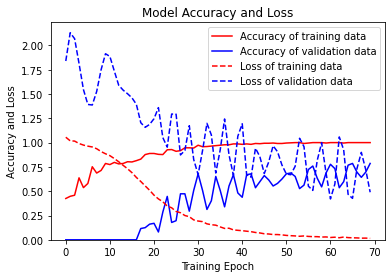

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       188
         1.0       1.00      0.87      0.93       187
         2.0       0.89      1.00      0.94       184

    accuracy                           0.96       559
   macro avg       0.96      0.96      0.96       559
weighted avg       0.96      0.96      0.96       559



In [476]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

# Print confusion matrix for training data
y_pred_train = model_m.predict(x_train)
# Take the class with the highest probability from the train predictions
max_y_pred_train = np.argmax(y_pred_train, axis=1)
print(classification_report(y_train, max_y_pred_train))

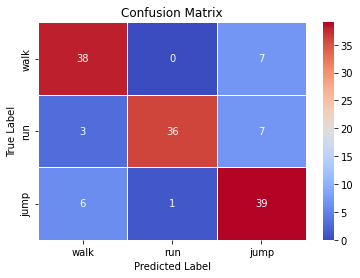

              precision    recall  f1-score   support

           0       0.81      0.84      0.83        45
           1       0.97      0.78      0.87        46
           2       0.74      0.85      0.79        46

    accuracy                           0.82       137
   macro avg       0.84      0.82      0.83       137
weighted avg       0.84      0.82      0.83       137



In [479]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

y_pred_test = model_m.predict(x_test)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
# max_y_test = np.argmax(y_test, axis=1)

show_confusion_matrix(y_test, max_y_pred_test)

print(classification_report(y_test, max_y_pred_test))